<a href="https://colab.research.google.com/github/luizgontijo/DataScience_Projects/blob/master/Digit_Recognizer_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![banner_mnist.jpg](/img/banner_mnist.png)

# MNIST Competition

In this competition, the goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. Each image is 28x28 pixels and corresponds to handwritten numbers. 

This notebook aims to apply neural networks to predict the number of each pixel set. The metodology of this work is:

1.   Set libraries;
2.   Set data from google drive;
3.   Analyze the data and show some numbers;
4.   Pre-process the images;
5.   Test some models based in neural networks using Keras library
6.   Choose the best model;
7.   Apply the model in the test dataset and create a file to submint.

This notebook was created to apply some lessons that I had about machine learning and image processing. This is a first try and has space to some improves and usage of others machine learning techniques, like CNN and LSTM.

I am very greatfull to show this work and I hope I can contribute with some future works.

## Setting libraries

In [5]:
# basics
import numpy as np 
import pandas as pd
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical


# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# modeling
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import History 
from keras.callbacks import EarlyStopping

# acess data from google drive
from google.colab import drive
from google.colab import files


## Setting the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test = pd.read_csv('/content/drive/My Drive/Datasets/digit-recognizer/test.csv')
train = pd.read_csv('/content/drive/My Drive/Datasets/digit-recognizer/train.csv')

## Analyzing the data

In [ ]:
print(train.shape) # 784 pixels in each image
train.head() 

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(test.shape) # test dataset do not has label column
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = (train.iloc[:,1:].values).astype('float32') # make a matrix pixel values for each label(number)
y_train = train.iloc[:,0].values.astype('int32') # number of each image - one number per row
X_test = test.values.astype('float32')

In [ ]:
print(X_train.shape)
X_train

(42000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(y_train.shape)
y_train

(42000,)


array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Show some images

In [ ]:
# convert rows to matrixes for each number
train.iloc[[1]] # each image with 785 pixels - images with 28x28 pixels

X_train = X_train.reshape(X_train.shape[0], 28, 28) 

Text(0.5, 1.0, '3')

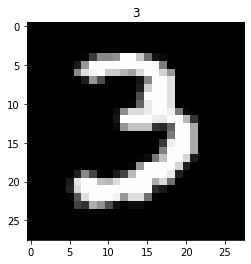

In [ ]:
plt.imshow(X_train[9], cmap=plt.get_cmap('gray')) # display one image
plt.title(y_train[9]) 

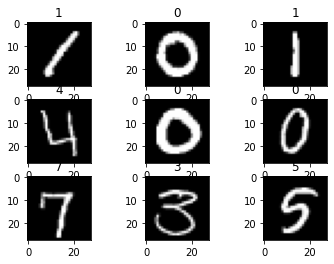

In [ ]:
# display more imagens
for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

## Pre-processing the data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28*28,) # back to initial matrix
X_test = X_test.reshape(X_test.shape[0], 28*28,)
print(X_train.shape)
print(X_test.shape)

(42000, 784)
(28000, 784)


In [ ]:
print(X_train.max(axis=1)) # max values in each row 

[255. 255. 255. ... 255. 255. 255.]


In [ ]:
# normalizing
scale = np.max(X_train)
X_train /= scale
X_test /= scale

In [ ]:
X_train.max(axis=1) # values normalized - max values = 1

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
# take out the mean to decrease the correlation
mean = np.std(X_train)
X_train -= mean
X_test -= mean

In [ ]:
input_shape = X_train.shape[1]
classes = y_train

In [ ]:
y_train =  to_categorical(y_train) # number of each set of pixels needs to be categorical

## Test some models

### model1: 1 hidden layer with 100 neurons

In [ ]:
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_model1 = model1.fit(X_train, y_train, nb_epoch=10, batch_size=16,validation_split=0.1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 5s 144us/step - loss: 0.3173 - accuracy: 0.9052 - val_loss: 0.2117 - val_accuracy: 0.9357
Epoch 2/10
37800/37800 [==============================] - 5s 132us/step - loss: 0.1531 - accuracy: 0.9533 - val_loss: 0.1657 - val_accuracy: 0.9476
Epoch 3/10
37800/37800 [==============================] - 5s 131us/step - loss: 0.1121 - accuracy: 0.9653 - val_loss: 0.1297 - val_accuracy: 0.9612
Epoch 4/10
37800/37800 [==============================] - 5s 134us/step - loss: 0.0873 - accuracy: 0.9728 - val_loss: 0.1240 - val_accuracy: 0.9595
Epoch 5/10
37800/37800 [==============================] - 5s 139us/step - loss: 0.0729 - accuracy: 0.9773 - val_loss: 0.1302 - val_accuracy: 0.9614
Epoch 6/10
37800/37800 [==============================] - 5s 133us/step - loss: 0.0621 - accuracy: 0.9799 - val_loss: 0.1215 - val_accuracy: 0.9626
Epoch 7/10
37800/37800 [==============================] - 5s 13

In [ ]:
history_model1.history['loss'][-1]

0.03810990891417734

In [ ]:
results = pd.DataFrame(data = {'model': 'model1', 
                               'loss': [history_model1.history['loss'][-1]], 
                               'accuracy': [history_model1.history['accuracy'][-1]], 
                               'val_loss': [history_model1.history['val_loss'][-1]], 
                               'val_accuracy': [history_model1.history['val_accuracy'][-1]]})
results

,model,loss,accuracy,val_loss,val_accuracy
0,model1,0.03811,0.987381,0.127144,0.967381


### model2 - 2 hidden layers with 100 neurons

In [ ]:
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model2.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_model2 = model2.fit(X_train, y_train, nb_epoch=10, batch_size=16,validation_split=0.1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 6s 147us/step - loss: 0.3043 - accuracy: 0.9054 - val_loss: 0.1947 - val_accuracy: 0.9400
Epoch 2/10
37800/37800 [==============================] - 5s 142us/step - loss: 0.1458 - accuracy: 0.9535 - val_loss: 0.1343 - val_accuracy: 0.9586
Epoch 3/10
37800/37800 [==============================] - 5s 143us/step - loss: 0.1103 - accuracy: 0.9647 - val_loss: 0.1353 - val_accuracy: 0.9598
Epoch 4/10
37800/37800 [==============================] - 5s 142us/step - loss: 0.0900 - accuracy: 0.9719 - val_loss: 0.1332 - val_accuracy: 0.9586
Epoch 5/10
37800/37800 [==============================] - 6s 146us/step - loss: 0.0754 - accuracy: 0.9762 - val_loss: 0.1652 - val_accuracy: 0.9521
Epoch 6/10
37800/37800 [==============================] - 6s 148us/step - loss: 0.0615 - accuracy: 0.9794 - val_loss: 0.1124 - val_accuracy: 0.9655
Epoch 7/10
37800/37800 [==============================] - 5s 14

In [ ]:
results = pd.DataFrame(data = {'model': ['model1', 'model2'], 
                               'loss': [history_model1.history['loss'][-1], history_model2.history['loss'][-1]], 
                               'accuracy': [history_model1.history['accuracy'][-1], history_model2.history['accuracy'][-1]], 
                               'val_loss': [history_model1.history['val_loss'][-1], history_model2.history['val_loss'][-1]], 
                               'val_accuracy': [history_model1.history['val_accuracy'][-1], history_model2.history['val_accuracy'][-1]]})
results


,model,loss,accuracy,val_loss,val_accuracy
0,model1,0.038110,0.987381,0.127144,0.967381
1,model2,0.040895,0.986323,0.123926,0.967143


### model3 - 3 hidden layers with 100 neurons

In [ ]:
model3 = Sequential()
model3.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model3.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model3.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_model3 = model3.fit(X_train, y_train, nb_epoch=10, batch_size=16,validation_split=0.1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 6s 158us/step - loss: 0.3089 - accuracy: 0.9042 - val_loss: 0.1729 - val_accuracy: 0.9486
Epoch 2/10
37800/37800 [==============================] - 6s 157us/step - loss: 0.1486 - accuracy: 0.9532 - val_loss: 0.1525 - val_accuracy: 0.9514
Epoch 3/10
37800/37800 [==============================] - 6s 155us/step - loss: 0.1154 - accuracy: 0.9635 - val_loss: 0.1276 - val_accuracy: 0.9595
Epoch 4/10
37800/37800 [==============================] - 6s 150us/step - loss: 0.0951 - accuracy: 0.9695 - val_loss: 0.1207 - val_accuracy: 0.9633
Epoch 5/10
37800/37800 [==============================] - 6s 151us/step - loss: 0.0762 - accuracy: 0.9755 - val_loss: 0.1131 - val_accuracy: 0.9657
Epoch 6/10
37800/37800 [==============================] - 6s 155us/step - loss: 0.0705 - accuracy: 0.9769 - val_loss: 0.1441 - val_accuracy: 0.9607
Epoch 7/10
37800/37800 [==============================] - 6s 15

In [ ]:
results = pd.DataFrame(data = {'model': ['model1', 'model2', 'model3'], 
                               'loss': [history_model1.history['loss'][-1], history_model2.history['loss'][-1], history_model3.history['loss'][-1]], 
                               'accuracy': [history_model1.history['accuracy'][-1], history_model2.history['accuracy'][-1], history_model3.history['accuracy'][-1]], 
                               'val_loss': [history_model1.history['val_loss'][-1], history_model2.history['val_loss'][-1], history_model3.history['val_loss'][-1]], 
                               'val_accuracy': [history_model1.history['val_accuracy'][-1], history_model2.history['val_accuracy'][-1], history_model3.history['val_accuracy'][-1]]})
results

,model,loss,accuracy,val_loss,val_accuracy
0,model1,0.038110,0.987381,0.127144,0.967381
1,model2,0.040895,0.986323,0.123926,0.967143
2,model3,0.046800,0.985423,0.142812,0.964048


### model4 - 4 hidden layers with 100 neurons

In [ ]:
model4 = Sequential()
model4.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model4.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model4.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model4.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model4.add(Dense(10, activation='softmax'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_model4 = model4.fit(X_train, y_train, nb_epoch=10, batch_size=16,validation_split=0.1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 7s 191us/step - loss: 0.3110 - accuracy: 0.9018 - val_loss: 0.1770 - val_accuracy: 0.9469
Epoch 2/10
37800/37800 [==============================] - 6s 164us/step - loss: 0.1581 - accuracy: 0.9512 - val_loss: 0.1806 - val_accuracy: 0.9476
Epoch 3/10
37800/37800 [==============================] - 6s 160us/step - loss: 0.1271 - accuracy: 0.9607 - val_loss: 0.1639 - val_accuracy: 0.9500
Epoch 4/10
37800/37800 [==============================] - 6s 162us/step - loss: 0.1046 - accuracy: 0.9671 - val_loss: 0.1419 - val_accuracy: 0.9538
Epoch 5/10
37800/37800 [==============================] - 7s 178us/step - loss: 0.0887 - accuracy: 0.9728 - val_loss: 0.1486 - val_accuracy: 0.9602
Epoch 6/10
37800/37800 [==============================] - 6s 162us/step - loss: 0.0779 - accuracy: 0.9756 - val_loss: 0.1209 - val_accuracy: 0.9688
Epoch 7/10
37800/37800 [==============================] - 6s 16

In [ ]:
results = pd.DataFrame(data = {'model': ['model1', 'model2', 'model3', 'model4'], 
                               'loss': [history_model1.history['loss'][-1], history_model2.history['loss'][-1], history_model3.history['loss'][-1], history_model4.history['loss'][-1]], 
                               'accuracy': [history_model1.history['accuracy'][-1], history_model2.history['accuracy'][-1], history_model3.history['accuracy'][-1], history_model4.history['accuracy'][-1]], 
                               'val_loss': [history_model1.history['val_loss'][-1], history_model2.history['val_loss'][-1], history_model3.history['val_loss'][-1], history_model4.history['val_loss'][-1]], 
                               'val_accuracy': [history_model1.history['val_accuracy'][-1], history_model2.history['val_accuracy'][-1], history_model3.history['val_accuracy'][-1], history_model4.history['val_accuracy'][-1]]})
results

,model,loss,accuracy,val_loss,val_accuracy
0,model1,0.038110,0.987381,0.127144,0.967381
1,model2,0.040895,0.986323,0.123926,0.967143
2,model3,0.046800,0.985423,0.142812,0.964048
3,model4,0.053528,0.982619,0.131830,0.966190


### model5 - 4 hidden layers with 50 neurons

In [ ]:
model5 = Sequential()
model5.add(Dense(50, activation='relu', input_shape=(input_shape,)))
model5.add(Dense(50, activation='relu', input_shape=(input_shape,)))
model5.add(Dense(50, activation='relu', input_shape=(input_shape,)))
model5.add(Dense(50, activation='relu', input_shape=(input_shape,)))
model5.add(Dense(10, activation='softmax'))
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_model5 = model5.fit(X_train, y_train, nb_epoch=10, batch_size=16,validation_split=0.1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 5s 134us/step - loss: 0.3767 - accuracy: 0.8812 - val_loss: 0.2106 - val_accuracy: 0.9338
Epoch 2/10
37800/37800 [==============================] - 5s 134us/step - loss: 0.1877 - accuracy: 0.9421 - val_loss: 0.1723 - val_accuracy: 0.9502
Epoch 3/10
37800/37800 [==============================] - 5s 127us/step - loss: 0.1463 - accuracy: 0.9542 - val_loss: 0.1589 - val_accuracy: 0.9517
Epoch 4/10
37800/37800 [==============================] - 5s 126us/step - loss: 0.1195 - accuracy: 0.9631 - val_loss: 0.1610 - val_accuracy: 0.9521
Epoch 5/10
37800/37800 [==============================] - 5s 127us/step - loss: 0.1079 - accuracy: 0.9668 - val_loss: 0.1645 - val_accuracy: 0.9521
Epoch 6/10
37800/37800 [==============================] - 5s 134us/step - loss: 0.0970 - accuracy: 0.9692 - val_loss: 0.1572 - val_accuracy: 0.9543
Epoch 7/10
37800/37800 [==============================] - 5s 13

In [ ]:
results = pd.DataFrame(data = {'model': ['model1', 'model2', 'model3', 'model4', 'model5'], 
                               'loss': [history_model1.history['loss'][-1], history_model2.history['loss'][-1], history_model3.history['loss'][-1], history_model4.history['loss'][-1], history_model5.history['loss'][-1]], 
                               'accuracy': [history_model1.history['accuracy'][-1], history_model2.history['accuracy'][-1], history_model3.history['accuracy'][-1], history_model4.history['accuracy'][-1], history_model5.history['accuracy'][-1]], 
                               'val_loss': [history_model1.history['val_loss'][-1], history_model2.history['val_loss'][-1], history_model3.history['val_loss'][-1], history_model4.history['val_loss'][-1], history_model5.history['val_loss'][-1]], 
                               'val_accuracy': [history_model1.history['val_accuracy'][-1], history_model2.history['val_accuracy'][-1], history_model3.history['val_accuracy'][-1], history_model4.history['val_accuracy'][-1], history_model5.history['val_accuracy'][-1]]})
results

,model,loss,accuracy,val_loss,val_accuracy
0,model1,0.038110,0.987381,0.127144,0.967381
1,model2,0.040895,0.986323,0.123926,0.967143
2,model3,0.046800,0.985423,0.142812,0.964048
3,model4,0.053528,0.982619,0.131830,0.966190
4,model5,0.065405,0.978889,0.149031,0.958571


### model6 - 3 hidden layers with 50 neurons

In [ ]:
model6 = Sequential()
model6.add(Dense(50, activation='relu', input_shape=(input_shape,)))
model6.add(Dense(50, activation='relu', input_shape=(input_shape,)))
model6.add(Dense(50, activation='relu', input_shape=(input_shape,)))
model6.add(Dense(10, activation='softmax'))
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_model6 = model6.fit(X_train, y_train, nb_epoch=10, batch_size=16,validation_split=0.1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 5s 129us/step - loss: 0.3519 - accuracy: 0.8888 - val_loss: 0.1991 - val_accuracy: 0.9410
Epoch 2/10
37800/37800 [==============================] - 5s 124us/step - loss: 0.1768 - accuracy: 0.9458 - val_loss: 0.1549 - val_accuracy: 0.9524
Epoch 3/10
37800/37800 [==============================] - 5s 124us/step - loss: 0.1396 - accuracy: 0.9557 - val_loss: 0.1625 - val_accuracy: 0.9529
Epoch 4/10
37800/37800 [==============================] - 5s 141us/step - loss: 0.1182 - accuracy: 0.9624 - val_loss: 0.1583 - val_accuracy: 0.9555
Epoch 5/10
37800/37800 [==============================] - 5s 129us/step - loss: 0.1009 - accuracy: 0.9665 - val_loss: 0.1307 - val_accuracy: 0.9602
Epoch 6/10
37800/37800 [==============================] - 5s 124us/step - loss: 0.0915 - accuracy: 0.9712 - val_loss: 0.1234 - val_accuracy: 0.9621
Epoch 7/10
37800/37800 [==============================] - 5s 12

In [ ]:
results = pd.DataFrame(data = {'model': ['model1', 'model2', 'model3', 'model4', 'model5', 'model6'], 
                               'loss': [history_model1.history['loss'][-1], history_model2.history['loss'][-1], history_model3.history['loss'][-1], history_model4.history['loss'][-1], history_model5.history['loss'][-1], history_model6.history['loss'][-1]], 
                               'accuracy': [history_model1.history['accuracy'][-1], history_model2.history['accuracy'][-1], history_model3.history['accuracy'][-1], history_model4.history['accuracy'][-1], history_model5.history['accuracy'][-1], history_model6.history['accuracy'][-1]], 
                               'val_loss': [history_model1.history['val_loss'][-1], history_model2.history['val_loss'][-1], history_model3.history['val_loss'][-1], history_model4.history['val_loss'][-1], history_model5.history['val_loss'][-1], history_model6.history['val_loss'][-1]], 
                               'val_accuracy': [history_model1.history['val_accuracy'][-1], history_model2.history['val_accuracy'][-1], history_model3.history['val_accuracy'][-1], history_model4.history['val_accuracy'][-1], history_model5.history['val_accuracy'][-1], history_model6.history['val_accuracy'][-1]]})
results

,model,loss,accuracy,val_loss,val_accuracy
0,model1,0.038110,0.987381,0.127144,0.967381
1,model2,0.040895,0.986323,0.123926,0.967143
2,model3,0.046800,0.985423,0.142812,0.964048
3,model4,0.053528,0.982619,0.131830,0.966190
4,model5,0.065405,0.978889,0.149031,0.958571
5,model6,0.061499,0.979497,0.138459,0.956905


**About the results**:
* It is worse when add layers
* To decrease neurons number do not make the results better
* For this configuration and model, model1 provides the bests results

### Some results about model1

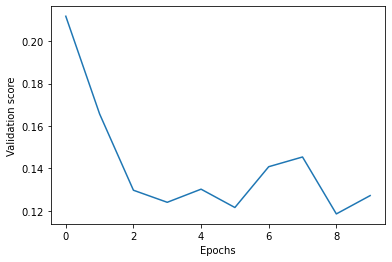

In [ ]:
plt.plot(history_model1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [ ]:
preds_model1 = model1.predict_classes(X_test, verbose=0)

In [ ]:
y_pred = model1.predict(X_test)
y_predict_classes = model1.predict_classes(X_test)

In [ ]:
y_predict_classes

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
y_test = pd.read_csv('/content/drive/My Drive/Datasets/digit-recognizer/sample_submission.csv')
y_test = y_test['Label']
y_test = y_test.astype('int32')

In [ ]:
Y_pred = np.argmax(y_pred, 1)
print(Y_pred)

[2 0 9 ... 3 9 2]


In [ ]:
def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)


In [ ]:
write_preds(y_predict_classes, "to_submit.csv")

In [ ]:
pd.read_csv('to_submit.csv')

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
